In [1]:
import tensorflow as tf

In [9]:
import IPython.display as display
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize']=(12,12)
mpl.rcParams['axes.grid']=False

import numpy as np
import PIL.Image
import time
import functools


In [10]:
def tentoimg(tensor):
    tensor =tensor*255
    tensor=np.array(tensor,dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0]==1
        tensor=tensor[0]
    return PIL.Image.fromarray(tensor)

In [12]:
def loadimg(pathimg):
    maxdim=512
    img=tf.io.read_file(pathimg)
    img=tf.image.decode_image(img,channels=3)
    img=tf.image.convert_image_dtype(img,tf.float32)
    
    shape=tf.cast(tf.shape(img)[:-1],tf.float32)
    longdim=max(shape)
    scale=(maxdim/longdim)
    
    newshape=tf.cast(shape*scale,tf.int32)
    
    img=tf.image.resize(img,newshape)
    img=img[tf.newaxis,:]
    return img

In [13]:
def imshow(image,title=None):
    if len(image.shape)>3:
        image=tf.squeeze(image,axis=0)
    plt.imshow(image)
    if title:
        plt.title(title)

In [41]:
contentpath=tf.keras.utils.get_file('abcccdgd.jpg', 'https://postfiles.pstatic.net/MjAyMTA0MjFfNDQg/MDAxNjE4OTM1NDUwMDEz.o1Ms5xLWaOwAx_IfcqWSDrq3flGkOptNPkfzs3ddOT8g.CZiPFiGY0D8_YVNAYtIuPsoBlZhqDx2g88ua3vIuBiUg.JPEG.qkrrudgh0/193677.jpg?type=w773')
style_path = tf.keras.utils.get_file('aaa.jpg','https://mblogthumb-phinf.pstatic.net/20150819_100/iamundine_1439970779216WcILD_JPEG/%BA%B0%C0%CC_%BA%FB%B3%AA%B4%C2_%B9%E3.jpg?type=w2')
contentimage=loadimg(contentpath)
styleimage=loadimg(style_path)

81920/75480 [================================] - 0s 0us/step


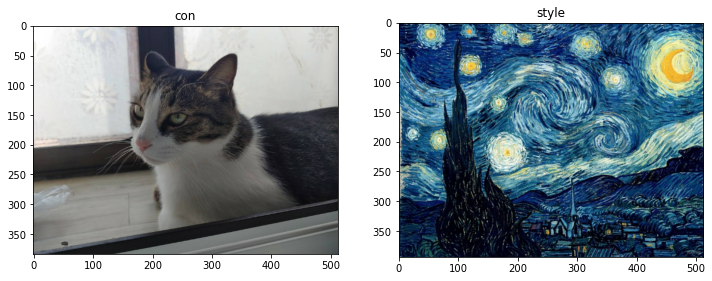

In [42]:
plt.subplot(1,2,1)
imshow(contentimage,'con')
plt.subplot(1,2,2)
imshow(styleimage,'style')

In [16]:
import tensorflow_hub as hub

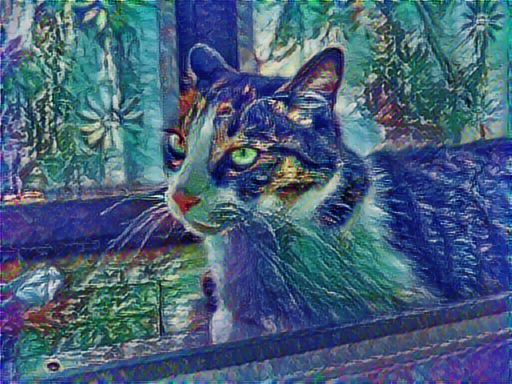

In [43]:
hubmodule=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
styleizeimage=hubmodule(tf.constant(contentimage),tf.constant(styleimage))[0]
tentoimg(styleizeimage)